In [1]:
library(tidyverse)
library(ggplot2)

data <- read_csv("../input/iris-flower-dataset/IRIS.csv")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Rows: 150 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): species
dbl (4): sepal_length, sepal_width, petal_length, petal_width

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Hey howdy hey folks! Welcome to my notebook. Get something to sip on and enjoy!
First, let's take a peek at the dataset and see what we're working with.

In [2]:
summary(data)

data %>%
  group_by(species) %>%
  summarize(count = n())

  sepal_length    sepal_width     petal_length    petal_width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.054   Mean   :3.759   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
   species         
 Length:150        
 Class :character  
 Mode  :character  
                   
                   
                   

species,count
<chr>,<int>
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


As we can see, we're given 50 data points for each species. Nice uniformity from the source.

Next, let's look at the dimensions individually and see how they appear.

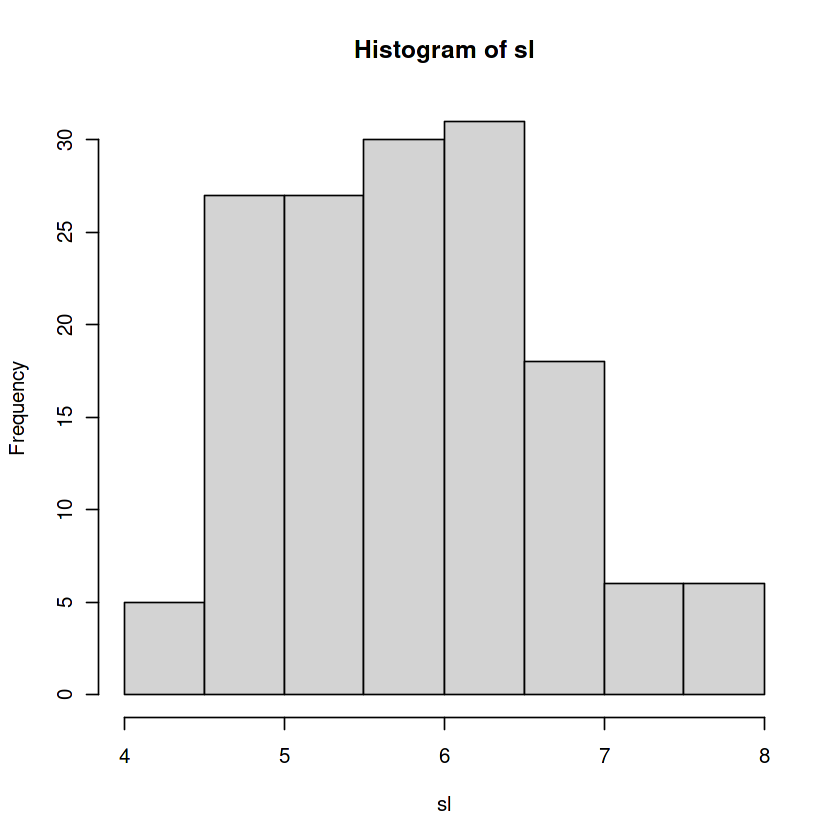

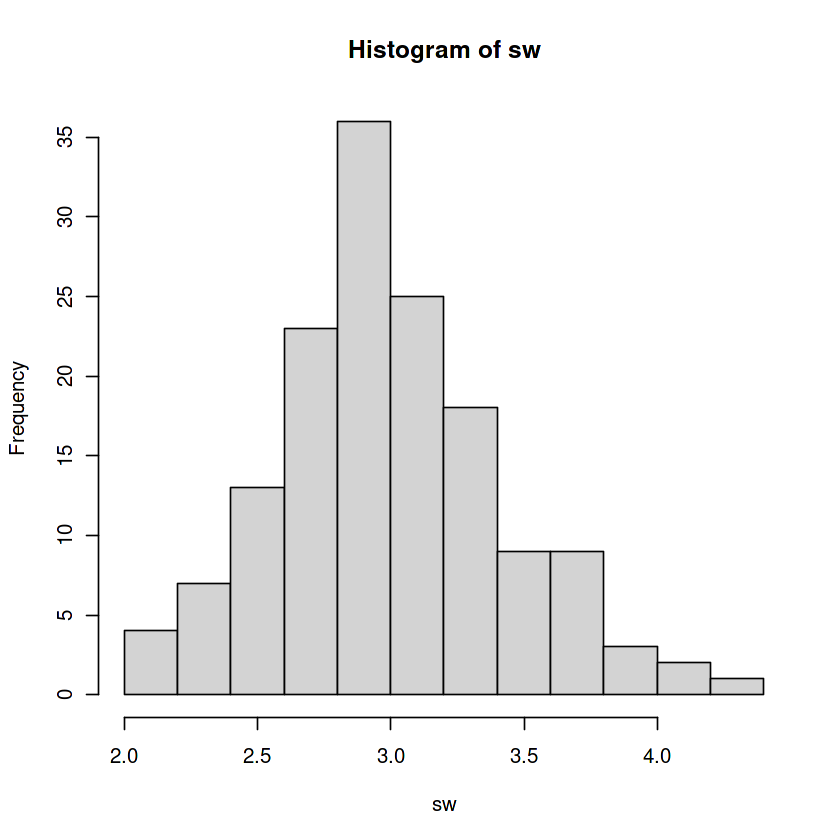

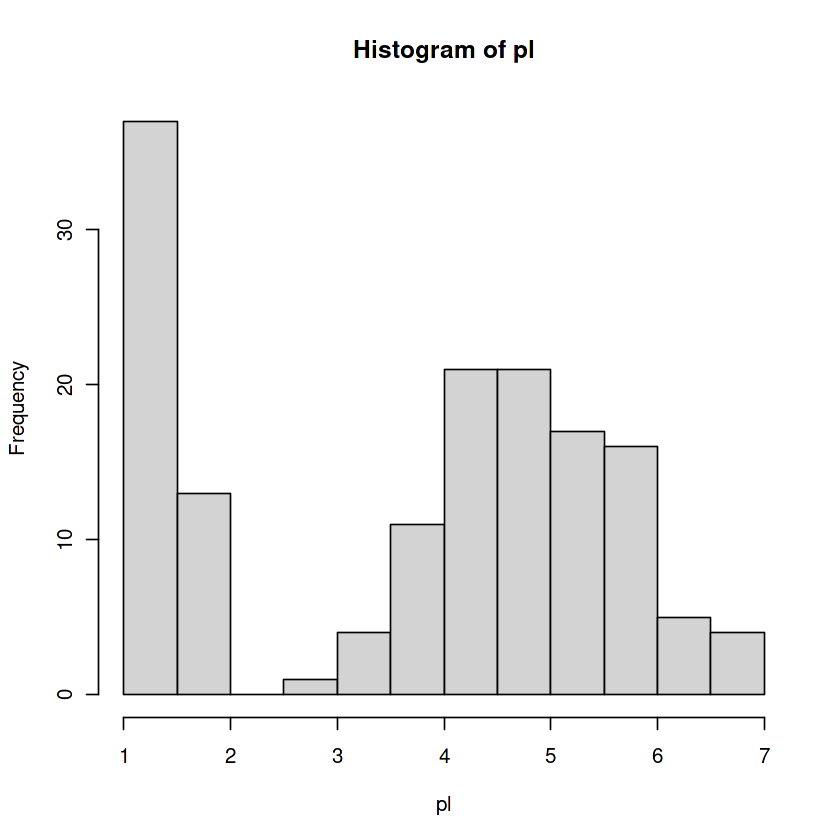

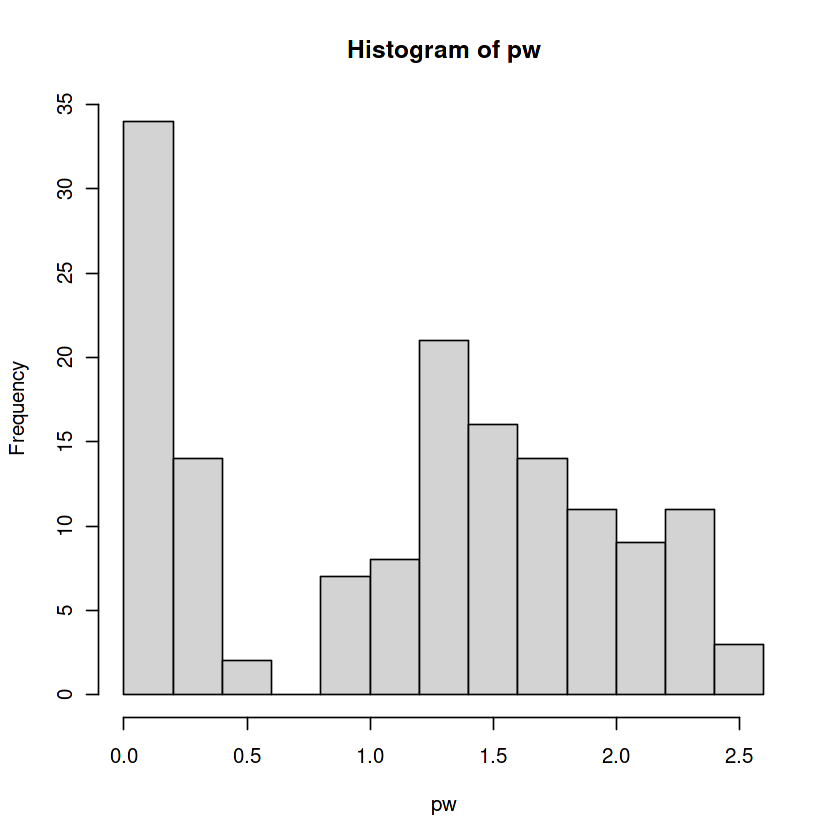

In [3]:
# getting quick and easy variables for each individual column

sl <- data$sepal_length
sw <- data$sepal_width
pl <- data$petal_length
pw <- data$petal_width

hist(sl)
hist(sw)
hist(pl)
hist(pw)

What can we gather from these histograms? Well, for starters, it seems as though Sepal Width has what would be the most normal distribution of the four variables. Sepal Length also has a sort of normal distribution, albeit one that's a little looser in terms of having a distinct peak in the center.

Petal Length and Width appear to be where we would be most likely to draw differences between the types of iris plants due to their non-normal shape. At least, based on the histograms I am making this guess. I will later confirm or reject this hypothesis through statistical methods.

Next, let us inspect confidence intervals for each variable, sorted by iris species

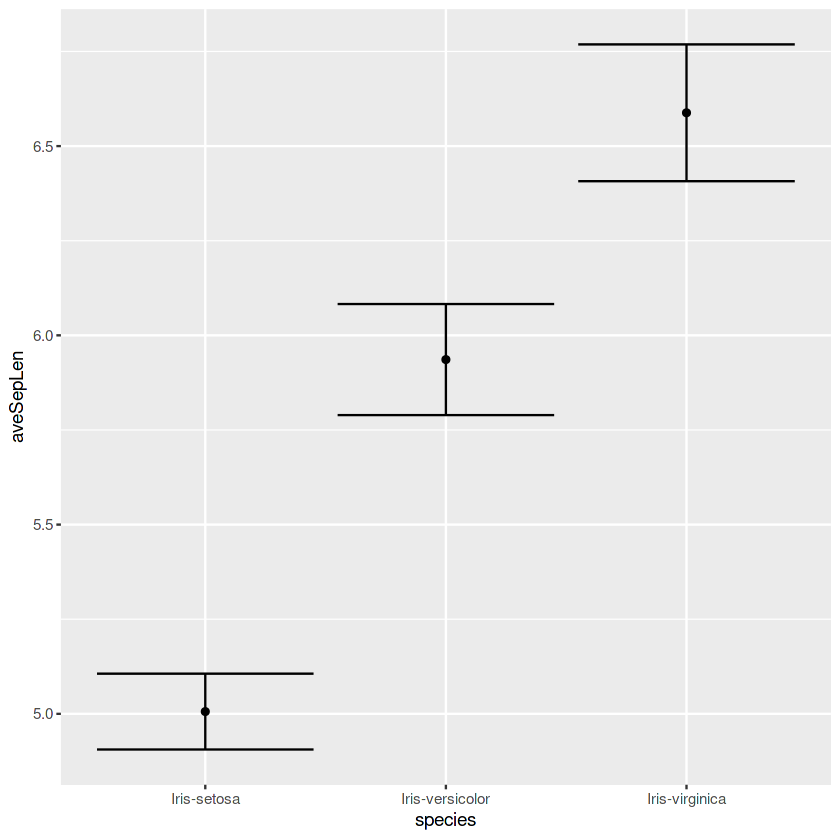

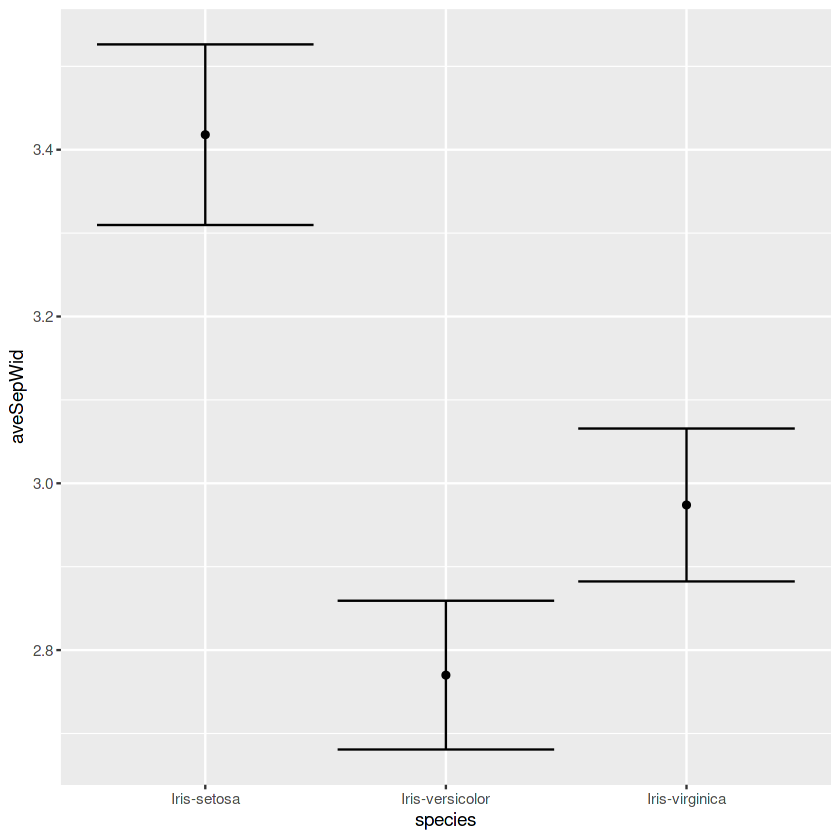

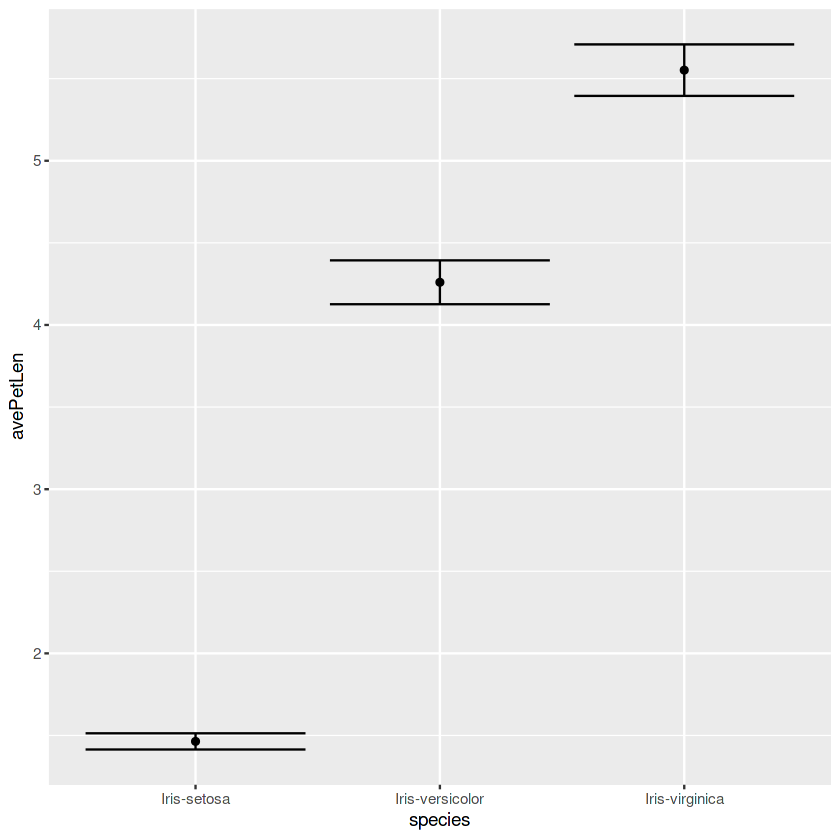

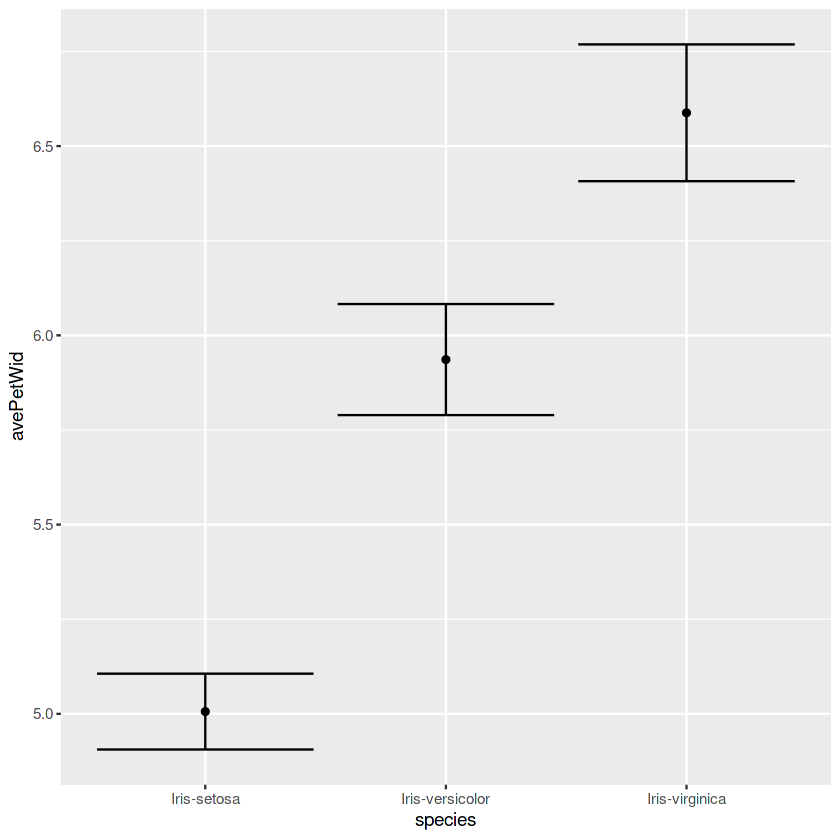

In [4]:
data %>%
  group_by(species) %>%
  summarize(aveSepLen = mean(sepal_length), seSepLen = sd(sepal_length)/sqrt(length(sepal_length)), tstar = qt(1-0.05/2, length(sepal_length) - 1)) %>%
  ggplot(aes(x = species, y = aveSepLen)) + geom_point() + geom_errorbar(aes(ymin = aveSepLen - seSepLen*tstar, ymax = aveSepLen + seSepLen*tstar))

data %>%
  group_by(species) %>%
  summarize(aveSepWid = mean(sepal_width), seSepWid = sd(sepal_width)/sqrt(length(sepal_width)), tstar = qt(1-0.05/2, length(sepal_width) - 1)) %>%
  ggplot(aes(x = species, y = aveSepWid)) + geom_point() + geom_errorbar(aes(ymin = aveSepWid - seSepWid*tstar, ymax = aveSepWid + seSepWid*tstar))

data %>%
  group_by(species) %>%
  summarize(avePetLen = mean(petal_length), sePetLen = sd(petal_length)/sqrt(length(petal_length)), tstar = qt(1-0.05/2, length(petal_length) - 1)) %>%
  ggplot(aes(x = species, y = avePetLen)) + geom_point() + geom_errorbar(aes(ymin = avePetLen - sePetLen*tstar, ymax = avePetLen + sePetLen*tstar))

data %>%
  group_by(species) %>%
  summarize(avePetWid = mean(sepal_length), sePetWid = sd(sepal_length)/sqrt(length(sepal_length)), tstar = qt(1-0.05/2, length(sepal_length) - 1)) %>%
  ggplot(aes(x = species, y = avePetWid)) + geom_point() + geom_errorbar(aes(ymin = avePetWid - sePetWid*tstar, ymax = avePetWid + sePetWid*tstar))

I gotta say, this is an interesting result. I did not expect the confidence intervals for each species to have such gaps between them.

First observation: The gap between setosa and the other two appears to be larger than that of versicolor and virginica overall. I think this will be useful in attempting to predict species based on the variables.

Next, let us move on to the One-Way ANOVA test to see how that pans out.

In [5]:
# For all 4 ANOVA tests, here are the null and alternative hypotheses:
# H0: mu(Setosa) = mu(Versicolor) = mu(Virginica)
# Ha: At least one of the averages is different from the others

print("Test 1")
oneway.test(sepal_length ~ species, data = data)
anova1 <- aov(sepal_length ~ species, data = data)
summary(anova1)

print("")
print("Test 2")
oneway.test(sepal_width ~ species, data = data)
anova2 <- aov(sepal_width ~ species, data = data)
summary(anova2)

print("")
print("Test 3")
oneway.test(petal_length ~ species, data = data)
anova3 <- aov(petal_length ~ species, data = data)
summary(anova3)

print("")
print("Test 4")
oneway.test(petal_width ~ species, data = data)
anova4 <- aov(petal_width ~ species, data = data)
summary(anova4)

[1] "Test 1"



	One-way analysis of means (not assuming equal variances)

data:  sepal_length and species
F = 138.91, num df = 2.000, denom df = 92.211, p-value < 2.2e-16


             Df Sum Sq Mean Sq F value Pr(>F)    
species       2  63.21  31.606   119.3 <2e-16 ***
Residuals   147  38.96   0.265                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

[1] ""
[1] "Test 2"



	One-way analysis of means (not assuming equal variances)

data:  sepal_width and species
F = 43.303, num df = 2.00, denom df = 97.37, p-value = 3.52e-14


             Df Sum Sq Mean Sq F value Pr(>F)    
species       2  10.98   5.489   47.36 <2e-16 ***
Residuals   147  17.04   0.116                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

[1] ""
[1] "Test 3"



	One-way analysis of means (not assuming equal variances)

data:  petal_length and species
F = 1826.6, num df = 2.000, denom df = 78.055, p-value < 2.2e-16


             Df Sum Sq Mean Sq F value Pr(>F)    
species       2  436.6  218.32    1179 <2e-16 ***
Residuals   147   27.2    0.19                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

[1] ""
[1] "Test 4"



	One-way analysis of means (not assuming equal variances)

data:  petal_width and species
F = 1268.3, num df = 2.000, denom df = 85.377, p-value < 2.2e-16


             Df Sum Sq Mean Sq F value Pr(>F)    
species       2  80.60   40.30   959.3 <2e-16 ***
Residuals   147   6.18    0.04                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

For all four tests, we can reject the null hypothesis as all four p-values fall below 0.05 by a significant margin. Based on this, we will need to use the post-hoc Tukey test to see where the specific differences lie.

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = sepal_length ~ species, data = data)

$species
                                diff       lwr       upr p adj
Iris-versicolor-Iris-setosa    0.930 0.6862273 1.1737727     0
Iris-virginica-Iris-setosa     1.582 1.3382273 1.8257727     0
Iris-virginica-Iris-versicolor 0.652 0.4082273 0.8957727     0


  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = sepal_width ~ species, data = data)

$species
                                 diff         lwr       upr     p adj
Iris-versicolor-Iris-setosa    -0.648 -0.80920105 -0.486799 0.0000000
Iris-virginica-Iris-setosa     -0.444 -0.60520105 -0.282799 0.0000000
Iris-virginica-Iris-versicolor  0.204  0.04279895  0.365201 0.0089521


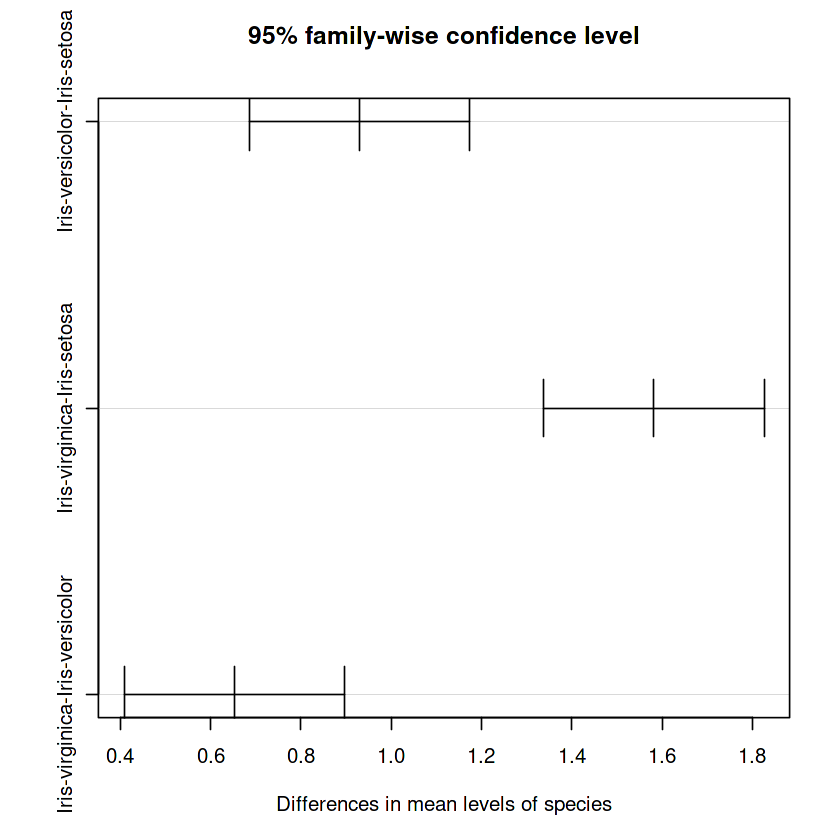

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = petal_length ~ species, data = data)

$species
                                diff     lwr     upr p adj
Iris-versicolor-Iris-setosa    2.796 2.59223 2.99977     0
Iris-virginica-Iris-setosa     4.088 3.88423 4.29177     0
Iris-virginica-Iris-versicolor 1.292 1.08823 1.49577     0


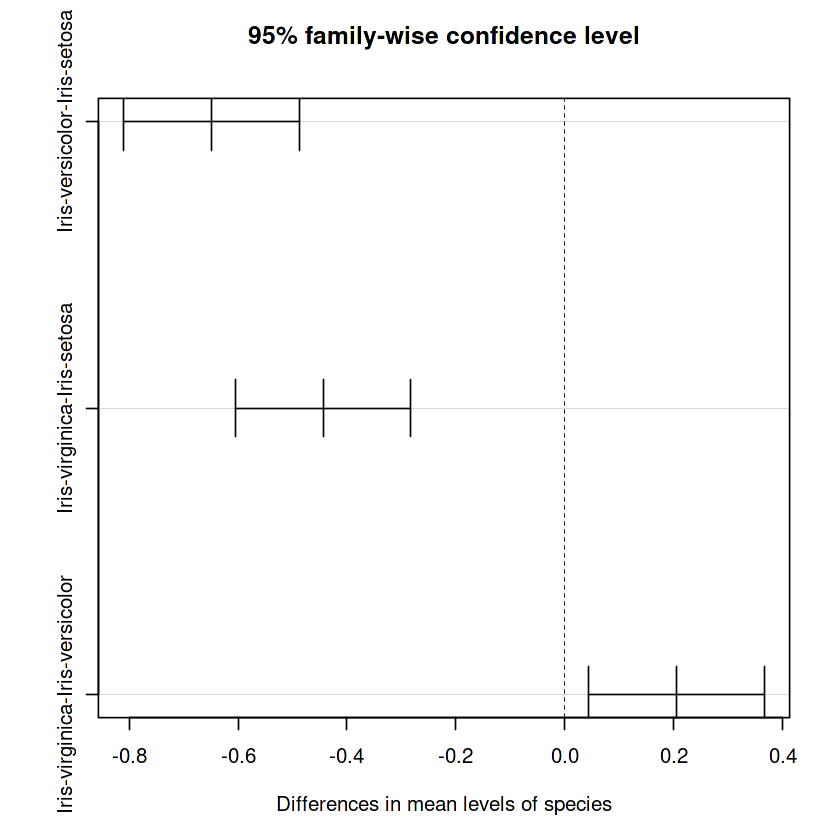

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = petal_width ~ species, data = data)

$species
                                diff       lwr       upr p adj
Iris-versicolor-Iris-setosa    1.082 0.9849409 1.1790591     0
Iris-virginica-Iris-setosa     1.782 1.6849409 1.8790591     0
Iris-virginica-Iris-versicolor 0.700 0.6029409 0.7970591     0


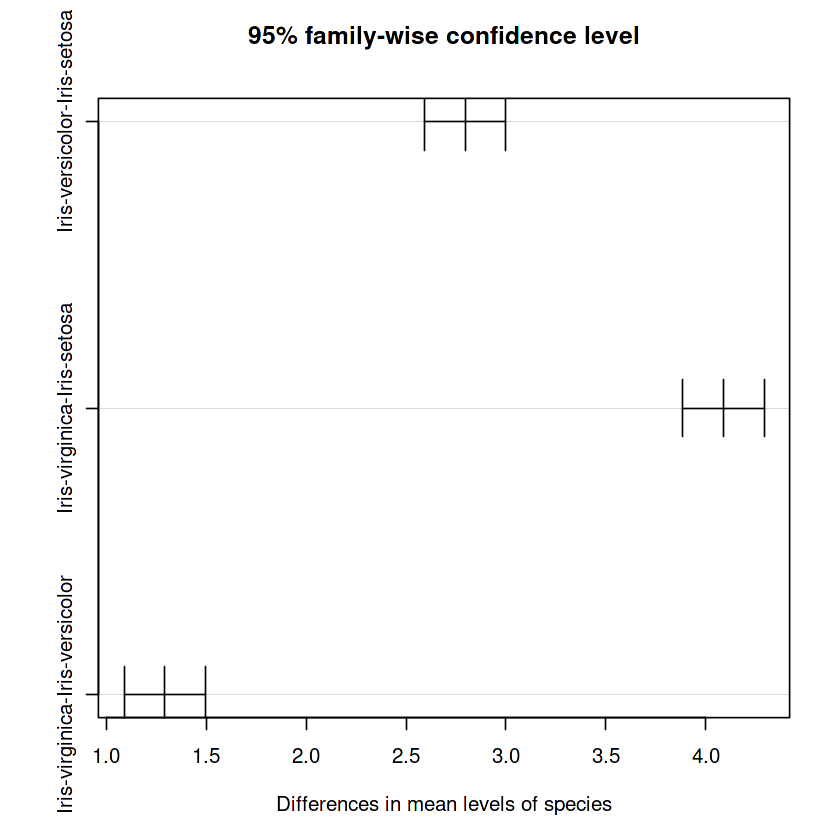

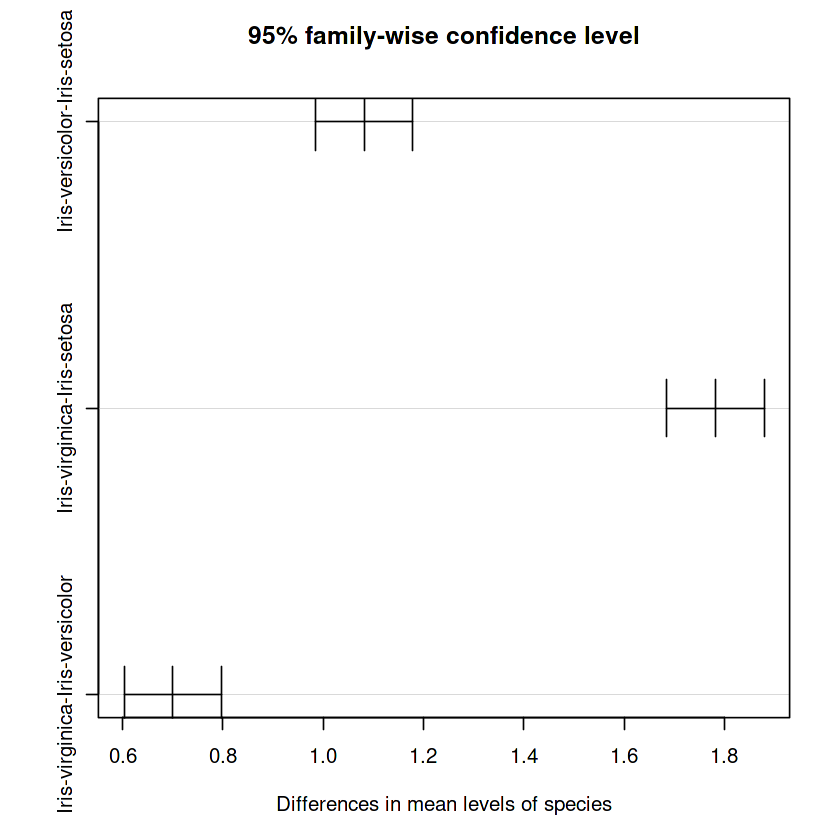

In [6]:
TukeyHSD(anova1)
plot(TukeyHSD(anova1))

TukeyHSD(anova2)
plot(TukeyHSD(anova2))

TukeyHSD(anova3)
plot(TukeyHSD(anova3))

TukeyHSD(anova4)
plot(TukeyHSD(anova4))

As we can see from the Tukey test, and as corroborated by the prior confidence intervals. It appears all of the values have statistically significant differences.